# IMPORTING THE LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
#Ignoring warnings
import warnings
warnings.filterwarnings("ignore")
from IPython.display import HTML, display
warnings.filterwarnings("ignore")

In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/air-quality-data-in-india/stations.csv
/kaggle/input/air-quality-data-in-india/station_hour.csv
/kaggle/input/air-quality-data-in-india/city_day.csv
/kaggle/input/air-quality-data-in-india/city_hour.csv
/kaggle/input/air-quality-data-in-india/station_day.csv


In [3]:
df= pd.read_csv('/kaggle/input/air-quality-data-in-india/city_day.csv',parse_dates=True)
df['Date'] = pd.to_datetime(df['Date'])

In [4]:
df.describe()

,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,29531,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,2018-05-14 05:40:15.807118080,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
min,2015-01-01 00:00:00,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,2017-04-16 00:00:00,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,2018-08-05 00:00:00,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,2019-09-03 00:00:00,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,2020-07-01 00:00:00,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000
std,NaN,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585


In [5]:
df = df[['City', 'Date', 'AQI', 'AQI_Bucket']]

In [6]:
cities=pd.unique(df['City'])
column1= cities+'_AQI'
column2=cities+'_AQI_Bucket'
columns=[*column1,*column2]

In [9]:
final_df=pd.DataFrame(index=np.arange('2015-01-01','2020-05-02',dtype='datetime64[D]'),columns=column1)

# If the AQI data exceeds the available rows, we can expand the DataFrame
for city, i in zip(cities, final_df.columns):
    aqi_values = np.array(df[df['City'] == city]['AQI'])  # Get the AQI values for the current city
    n = len(aqi_values)  # Length of AQI data
    
    if n > len(final_df[i]):  # If AQI data is larger than final_df rows, expand the DataFrame
        additional_rows = n - len(final_df[i])
        # Expand the DataFrame by adding the required additional rows
        new_index = pd.date_range(final_df.index[0], periods=len(final_df.index) + additional_rows, freq='D')
        final_df = final_df.reindex(new_index)
    
    final_df[i][-n:] = aqi_values  # Fill the DataFrame with AQI data


In [10]:
final_df = final_df.astype('float64')
final_df = final_df.resample(rule='MS').mean()

In [11]:
final_df.tail()

,Ahmedabad_AQI,Aizawl_AQI,Amaravati_AQI,Amritsar_AQI,Bengaluru_AQI,Bhopal_AQI,Brajrajnagar_AQI,Chandigarh_AQI,Chennai_AQI,Coimbatore_AQI,...,Jorapokhar_AQI,Kochi_AQI,Kolkata_AQI,Lucknow_AQI,Mumbai_AQI,Patna_AQI,Shillong_AQI,Talcher_AQI,Thiruvananthapuram_AQI,Visakhapatnam_AQI
2020-03-01,277.466667,65.350000,52.548387,83.733333,90.741935,109.714286,124.100000,55.419355,70.290323,78.272727,...,163.166667,129.166667,122.838710,134.000000,104.645161,158.419355,67.870968,117.250000,74.741935,85.100000
2020-04-01,120.733333,39.233333,44.400000,58.708333,68.533333,113.782609,137.923077,44.586207,63.500000,84.823529,...,121.400000,77.033333,70.366667,106.733333,74.333333,131.166667,75.750000,132.137931,57.066667,54.321429
2020-05-01,128.677419,24.193548,59.096774,77.677419,73.161290,104.451613,129.133333,74.129032,78.677419,57.931034,...,135.580645,84.724138,53.161290,119.096774,63.935484,138.516129,32.451613,101.333333,55.967742,64.903226
2020-06-01,97.357143,20.862069,47.866667,101.533333,55.166667,71.666667,117.333333,66.500000,103.066667,38.366667,...,136.533333,93.866667,46.466667,96.500000,53.300000,82.366667,32.678571,81.055556,45.400000,82.200000
2020-07-01,119.000000,20.000000,54.000000,78.000000,43.000000,69.000000,NaN,66.000000,92.000000,NaN,...,86.000000,102.000000,45.000000,76.000000,53.000000,98.000000,24.000000,101.000000,41.000000,50.000000


In [12]:
final_df['India_AQI']=final_df.mean(axis=1)

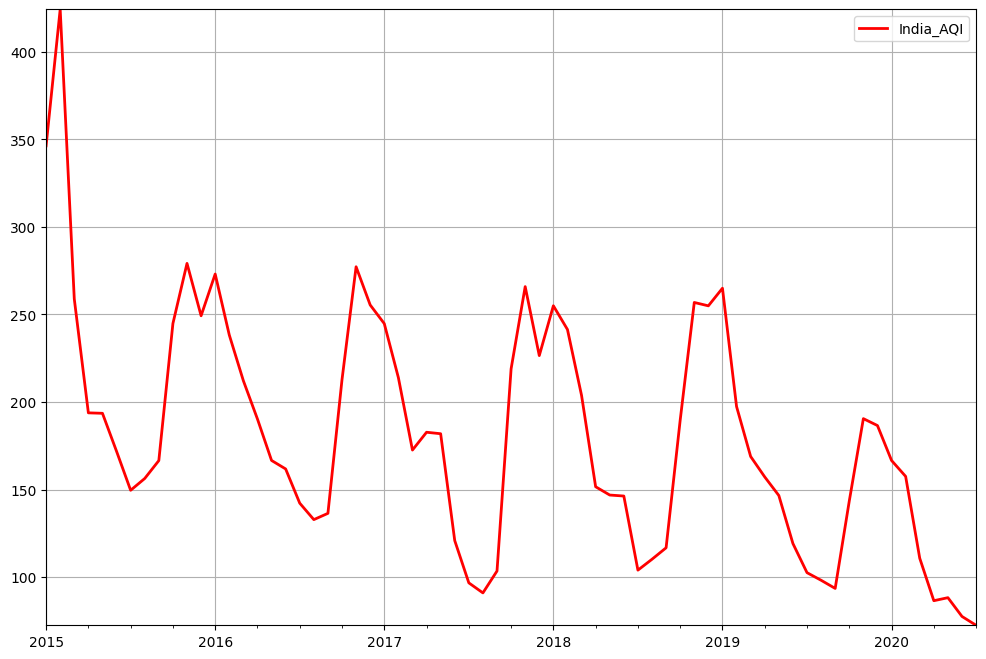

In [13]:
ax=final_df[['India_AQI']].plot(figsize=(12,8),grid=True,lw=2,color='Red')
ax.autoscale(enable=True, axis='both', tight=True)

In [14]:
df_2019=final_df['2019-01-01':'2020-01-01']
df_2019.head()

,Ahmedabad_AQI,Aizawl_AQI,Amaravati_AQI,Amritsar_AQI,Bengaluru_AQI,Bhopal_AQI,Brajrajnagar_AQI,Chandigarh_AQI,Chennai_AQI,Coimbatore_AQI,...,Kochi_AQI,Kolkata_AQI,Lucknow_AQI,Mumbai_AQI,Patna_AQI,Shillong_AQI,Talcher_AQI,Thiruvananthapuram_AQI,Visakhapatnam_AQI,India_AQI
2019-01-01,755.516129,NaN,218.612903,94.633333,116.806452,NaN,259.967742,NaN,131.000000,NaN,...,NaN,360.838710,315.516129,165.516129,405.290323,NaN,289.400000,128.161290,263.129032,264.985723
2019-02-01,560.535714,NaN,114.464286,94.892857,106.250000,NaN,208.259259,NaN,118.071429,NaN,...,NaN,266.071429,243.071429,149.821429,296.107143,NaN,322.555556,88.428571,152.307692,197.428013
2019-03-01,601.741935,NaN,79.967742,99.733333,122.129032,NaN,186.870968,NaN,101.419355,NaN,...,NaN,157.774194,217.645161,123.483871,214.032258,NaN,189.888889,88.838710,93.033333,168.896689
2019-04-01,633.518519,NaN,78.133333,112.000000,124.300000,NaN,190.562500,NaN,87.533333,NaN,...,NaN,86.800000,217.700000,98.066667,151.100000,NaN,142.160000,69.933333,92.827586,157.218977
2019-05-01,412.769231,NaN,106.777778,113.258065,105.387097,NaN,130.464286,NaN,103.612903,NaN,...,NaN,88.548387,184.096774,87.870968,170.806452,NaN,130.413793,75.419355,123.933333,146.614816


Looking for the count of rows having missing values

In [15]:
df_2019.isna().sum()

Ahmedabad_AQI              0
Aizawl_AQI                13
Amaravati_AQI              1
Amritsar_AQI               0
Bengaluru_AQI              0
Bhopal_AQI                 8
Brajrajnagar_AQI           0
Chandigarh_AQI             8
Chennai_AQI                0
Coimbatore_AQI             5
Delhi_AQI                  0
Ernakulam_AQI             12
Gurugram_AQI               0
Guwahati_AQI               1
Hyderabad_AQI              0
Jaipur_AQI                 0
Jorapokhar_AQI             1
Kochi_AQI                 12
Kolkata_AQI                0
Lucknow_AQI                0
Mumbai_AQI                 0
Patna_AQI                  0
Shillong_AQI               8
Talcher_AQI                0
Thiruvananthapuram_AQI     0
Visakhapatnam_AQI          0
India_AQI                  0
dtype: int64

Removing the entries whose data is missing entirely

In [16]:
df_2019=df_2019.drop(['Aizawl_AQI','Ernakulam_AQI','Kochi_AQI'],axis=1)

Taking average of all the months for each city to find the AQI for the year 2019

In [18]:
AQI_2019=df_2019.mean(axis=0)

## Boxplots of AQI values of the various cities

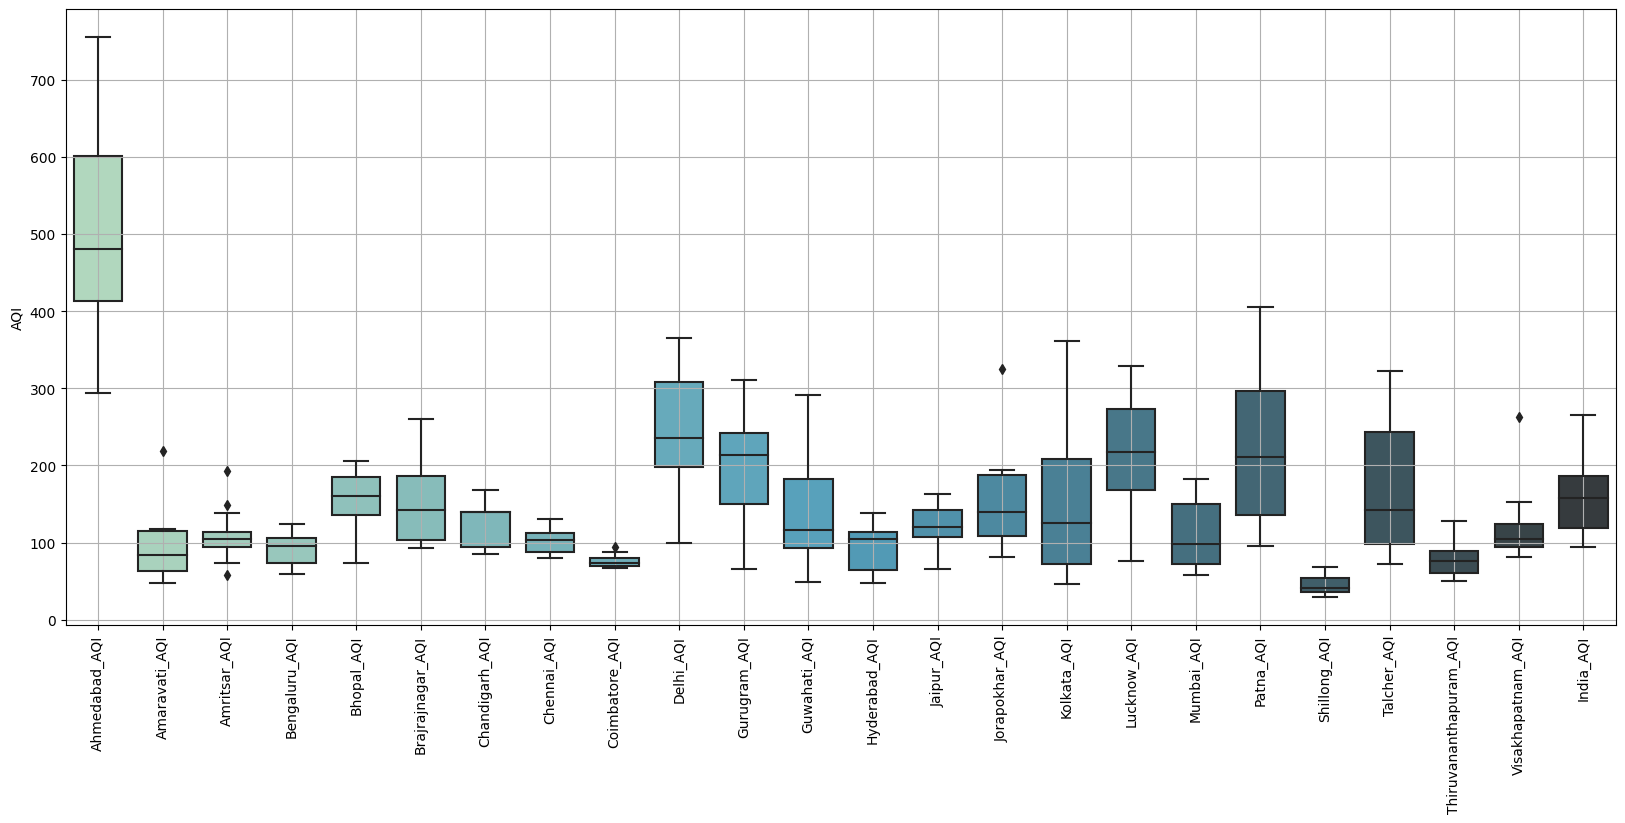

In [19]:
plt.figure(figsize=(20,8))
plt.xticks(rotation=90)
bplot = sns.boxplot( data=df_2019,  width=0.75,palette="GnBu_d")
plt.ylabel('AQI');
bplot.grid(True)

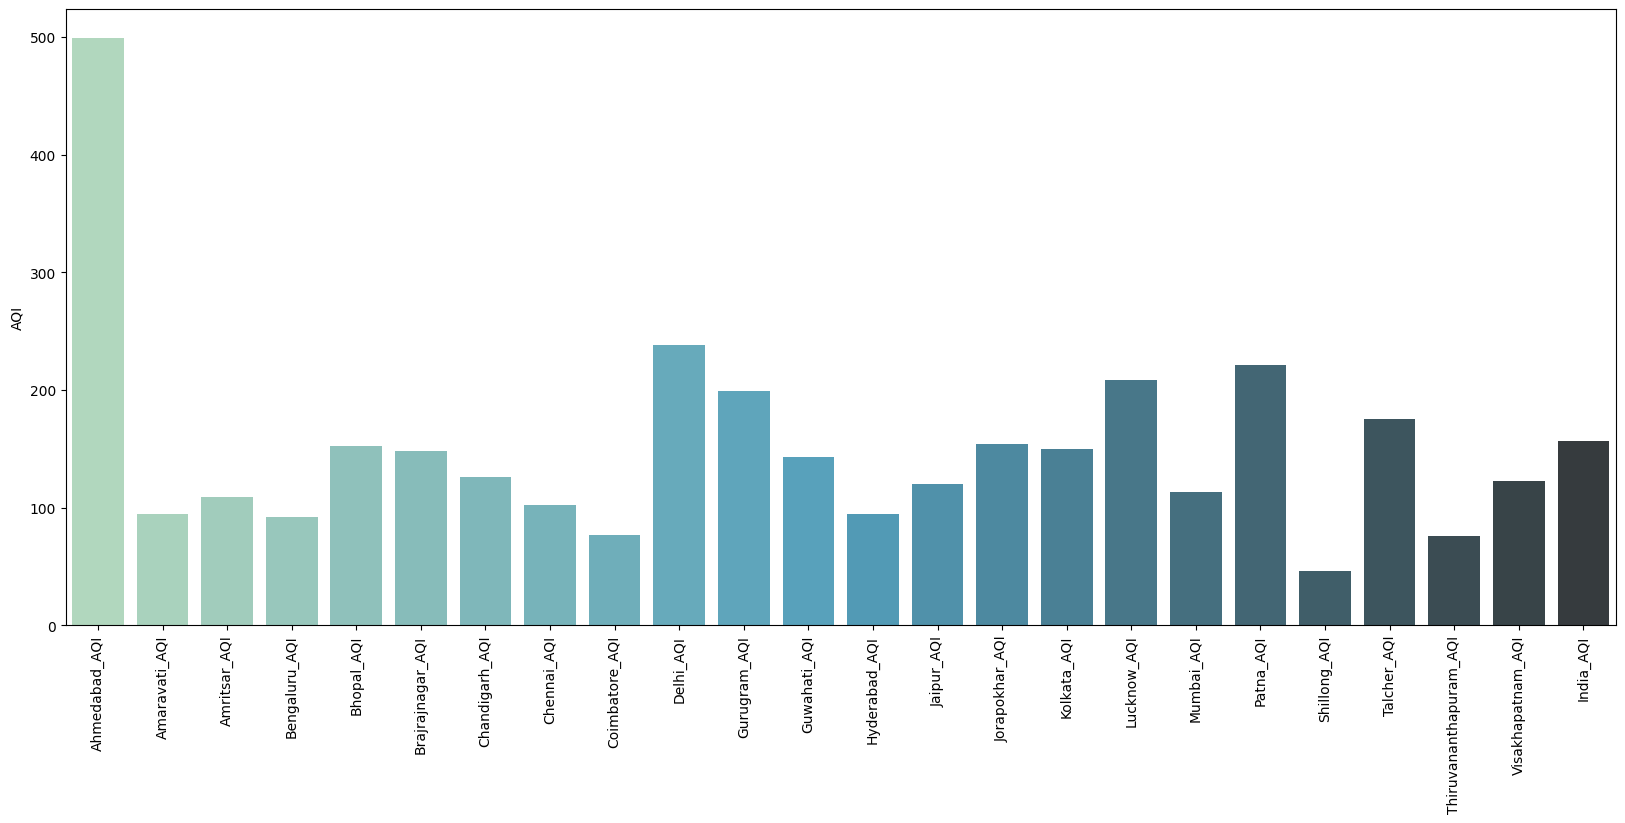

In [20]:
plt.figure(figsize=(20, 8))
plt.xticks(rotation=90)
plt.ylabel('AQI')

bplot = sns.barplot(x=AQI_2019.index, y=AQI_2019.values, palette="GnBu_d")


## Analysing and Forecasting AQI values

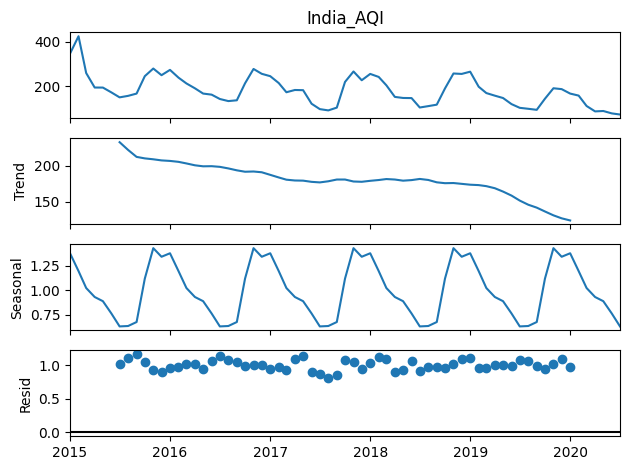

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose
India_AQI=final_df['India_AQI']
result=seasonal_decompose(India_AQI,model='multiplicative')
result.plot();

Seasonality causes the increase in AQI during certain months

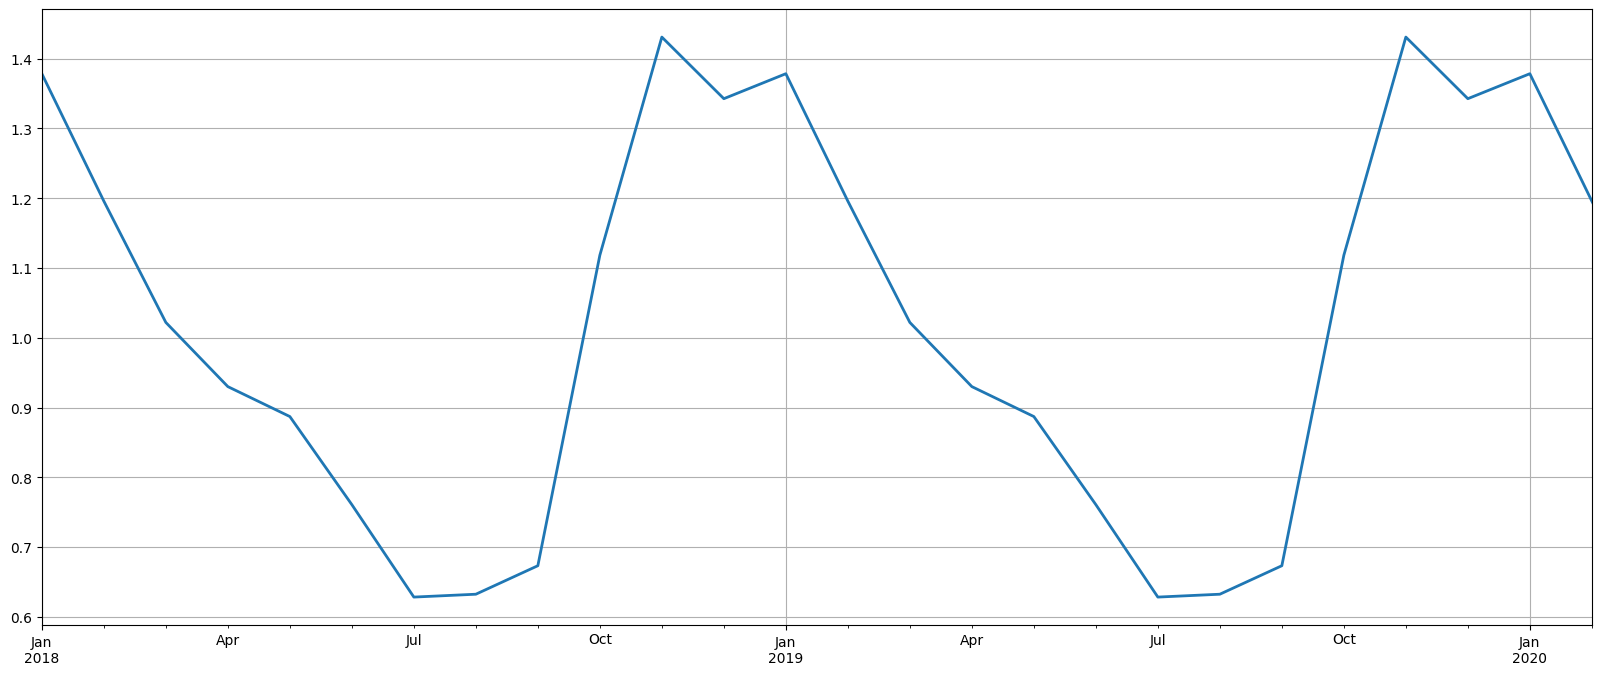

In [22]:
from matplotlib import dates
ax=result.seasonal.plot(xlim=['2018-01-01','2020-02-10'],figsize=(20,8),lw=2)
ax.yaxis.grid(True)
ax.xaxis.grid(True)

### Forecasting:

We will be using three methods for forecasting values of AQI,
1) Sarima(Seasonal Autoregressive Integrated Moving Average)
2) RNN
3) LSTM

In [23]:
# Load specific forecasting tools
from statsmodels.tsa.statespace.sarimax import SARIMAX
!pip install pmdarima;
from pmdarima import auto_arima;                              # for determining ARIMA orders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 19.1 MB/s eta 0:00:0000:0100:01


In [24]:
auto_arima(y=India_AQI,start_p=0,start_P=0,start_q=0,start_Q=0,seasonal=True, m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                   67
Model:             SARIMAX(0, 1, 2)x(1, 0, [1], 12)   Log Likelihood                -316.908
Date:                              Sat, 28 Sep 2024   AIC                            643.816
Time:                                      14:16:33   BIC                            654.765
Sample:                                  01-01-2015   HQIC                           648.143
                                       - 07-01-2020                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0189      0.059      0.320      0.749      -0.097       0.135
ma.L2         -0.8363      0.069    -12.077      0.000      -0.972      -0.701
ar.S.L12       0.9444      0.062     15.221      0.000       0.823       1.066
ma.S.L12      -0.5623      0.229     -2.458      0.014      -1.011      -0.114
sigma2       694.3701    142.982      4.856      0.000     414.130     974.610
===================================================================================
Ljung-Box (L1) (Q):                   0.95   Jarque-Bera (JB):                 2.99
Prob(Q):                              0.33   Prob(JB):                         0.22
Heteroskedasticity (H):               0.38   Skew:                            -0.52
Prob(H) (two-sided):                  0.03   Kurtosis:                         2.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [25]:
len(India_AQI)

67

In [26]:
#dividing into train and test:
train=India_AQI[:41]
test=India_AQI[42:54]

In [27]:
# Forming the model:
model=SARIMAX(train,order=(1,1,1),seasonal_order=(1,0,1,12),)
results=model.fit()
results.summary()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.08255D+00    |proj g|=  2.35068D-01

At iterate    5    f=  5.00489D+00    |proj g|=  7.64118D-02

At iterate   10    f=  4.98460D+00    |proj g|=  2.80133D-02

At iterate   15    f=  4.97585D+00    |proj g|=  2.67287D-03

At iterate   20    f=  4.97091D+00    |proj g|=  2.19169D-03

At iterate   25    f=  4.97064D+00    |proj g|=  3.52649D-03

At iterate   30    f=  4.97050D+00    |proj g|=  1.23657D-03

At iterate   35    f=  4.97010D+00    |proj g|=  6.43502D-04

At iterate   40    f=  4.97006D+00    |proj g|=  1.52521D-04

At iterate   45    f=  4.97006D+00    |proj g|=  3.80593D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                          India_AQI   No. Observations:                   41
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -203.772
Date:                            Sat, 28 Sep 2024   AIC                            417.545
Time:                                    14:16:46   BIC                            425.989
Sample:                                01-01-2015   HQIC                           420.598
                                     - 05-01-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6968      0.195     -3.574      0.000      -1.079      -0.315
ma.L1          0.9997      6.965      0.144      0.886     -12.651      14.651
ar.S.L12       0.9390      0.285      3.294      0.001       0.380       1.498
ma.S.L12      -0.6587      0.777     -0.847      0.397      -2.182       0.865
sigma2      1226.9136   8298.941      0.148      0.882    -1.5e+04    1.75e+04
===================================================================================
Ljung-Box (L1) (Q):                   1.53   Jarque-Bera (JB):                17.59
Prob(Q):                              0.22   Prob(JB):                         0.00
Heteroskedasticity (H):               0.26   Skew:                            -0.72
Prob(H) (two-sided):                  0.02   Kurtosis:                         5.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [28]:
#Obtaining predicted values:
predictions = results.predict(start=42, end=53, typ='levels').rename('Predictions')

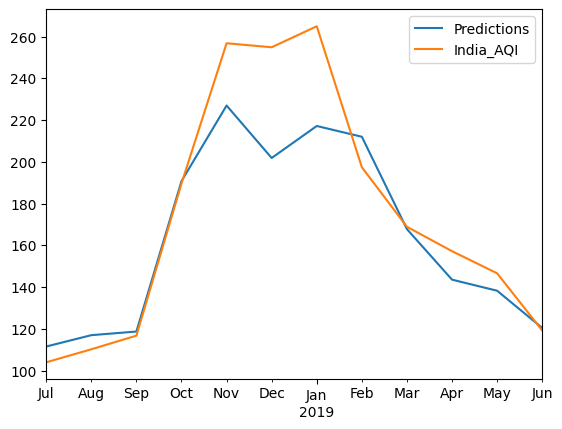

In [29]:
#Plotting predicted values against the true values:
predictions.plot(legend=True)
test.plot(legend=True);

In [30]:
from sklearn.metrics import mean_squared_error
RMSE=np.sqrt(mean_squared_error(predictions,test))
print('RMSE = ',RMSE)
print('Mean AQI',test.mean())

RMSE =  23.394261350147993
Mean AQI 173.89252879752266


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.25642D+00    |proj g|=  3.43748D-01

At iterate    5    f=  4.94279D+00    |proj g|=  5.53102D-03

At iterate   10    f=  4.91978D+00    |proj g|=  2.58331D-02

At iterate   15    f=  4.90025D+00    |proj g|=  1.37290D-02


 This problem is unconstrained.



At iterate   20    f=  4.89789D+00    |proj g|=  1.50934D-03

At iterate   25    f=  4.89636D+00    |proj g|=  1.35754D-03

At iterate   30    f=  4.89618D+00    |proj g|=  1.94322D-05

At iterate   35    f=  4.89615D+00    |proj g|=  2.87327D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     38     47      1     0     0   9.552D-06   4.896D+00
  F =   4.8961490964259307     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


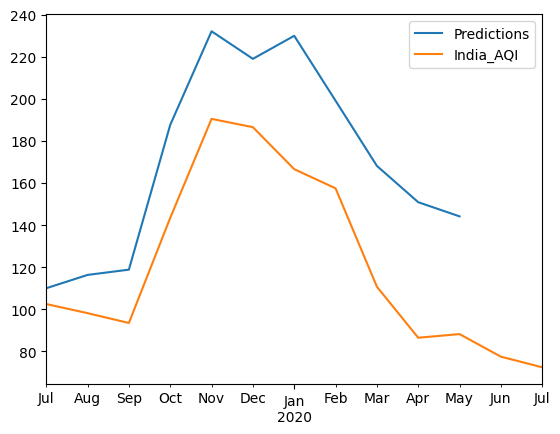

In [31]:
#dividing into train and test:
train=India_AQI[:53]
test=India_AQI[54:]
# Forming the model:
model=SARIMAX(train,order=(1,1,1),seasonal_order=(1,0,1,12),)
results=model.fit()
results.summary()
#Obtaining predicted values:
predictions = results.predict(start=54, end=64, typ='levels').rename('Predictions')
#Plotting predicted values against the true values:
predictions.plot(legend=True)
test.plot(legend=True);

In [32]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Ensure predictions and test data have the same length
test_trimmed = test[:len(predictions)]  # Trim the test set to match predictions length

# Calculate RMSE
RMSE = np.sqrt(mean_squared_error(predictions, test_trimmed))
print('RMSE = ', RMSE)
print('Mean AQI:', test_trimmed.mean())

RMSE =  44.801863058729374
Mean AQI: 129.50398238731393


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.00452D+00    |proj g|=  3.33862D-01

At iterate    5    f=  4.85409D+00    |proj g|=  1.51810D-02

At iterate   10    f=  4.78900D+00    |proj g|=  3.44975D-02

At iterate   15    f=  4.78245D+00    |proj g|=  5.62206D-03


 This problem is unconstrained.



At iterate   20    f=  4.77881D+00    |proj g|=  2.52565D-04

At iterate   25    f=  4.77809D+00    |proj g|=  1.39406D-02

At iterate   30    f=  4.77624D+00    |proj g|=  2.44830D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     34     42      1     0     0   9.640D-06   4.776D+00
  F =   4.7762433830429876     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


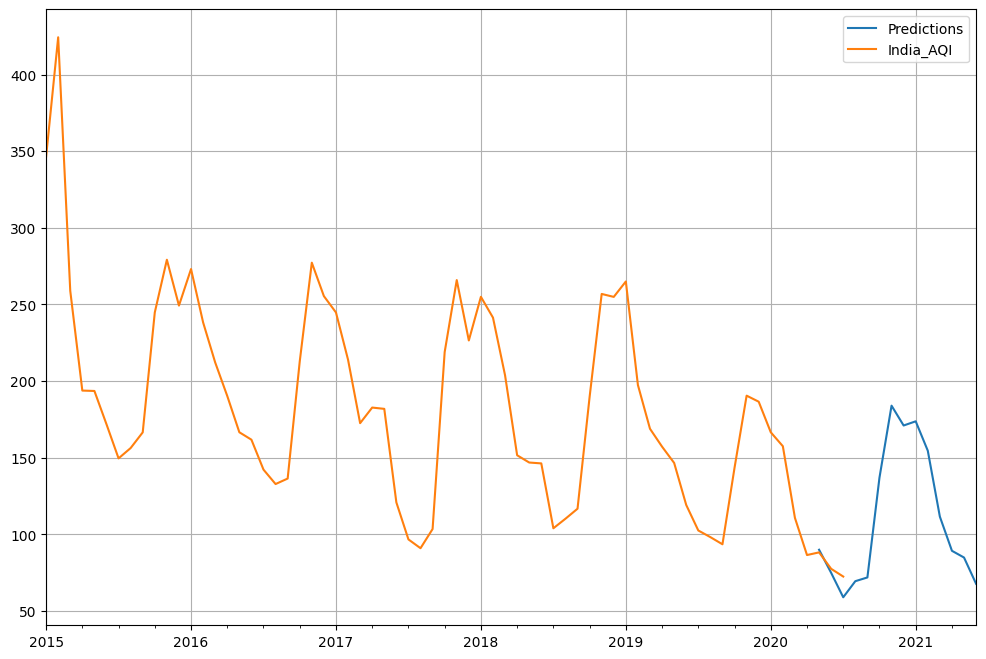

In [33]:
# Forming the model:
model=SARIMAX(India_AQI,order=(1,1,1),seasonal_order=(1,0,1,12))
results=model.fit()
results.summary()
#Obtaining predicted values:
predictions = results.predict(start=64, end=77, typ='levels').rename('Predictions')
#Plotting predicted values against the true values:
predictions.plot(legend=True)
India_AQI.plot(legend=True,figsize=(12,8),grid=True);

RMSE: 15.95200443847537


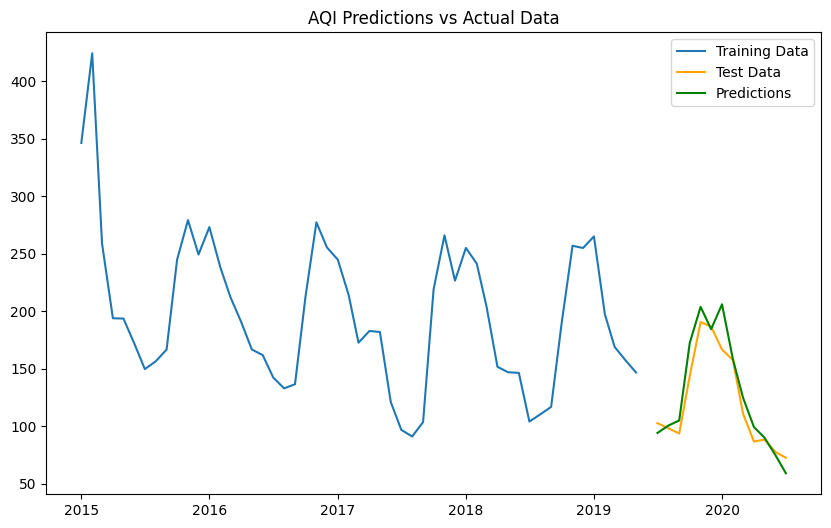

In [34]:
# Predicting for the test period
predictions = results.predict(start=test.index[0], end=test.index[-1], dynamic=False)
rmse = np.sqrt(mean_squared_error(test, predictions))
print(f'RMSE: {rmse}')

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Test Data', color='orange')
plt.plot(test.index, predictions, label='Predictions', color='green')
plt.legend()
plt.title('AQI Predictions vs Actual Data')
plt.show()

## Saving the Model using Pickle file

In [37]:
import pickle
with open('sarima_model.pkl', 'wb') as pkl_file:
    pickle.dump(results, pkl_file)
    
print("Model saved as sarima_model.pkl")

Model saved as sarima_model.pkl
